<center><font color="#e30b5d"><h1>Question 6</h1></font></center>

In [47]:
import pandas                   as pd
import numpy                    as np
import seaborn                  as sns
import matplotlib.pyplot        as plt

from sklearn.model_selection    import train_test_split
from sklearn.neural_network     import MLPClassifier
from sklearn.metrics            import accuracy_score
from sklearn.metrics            import classification_report
from sklearn.metrics            import confusion_matrix
from sklearn.preprocessing      import StandardScaler

In [25]:
df          = pd.read_csv('ECG.csv', index_col=0)
data        = df.iloc[:, 1:]
labels      = df.iloc[:, [0]]
columnName  = data.columns
data.head();

In [26]:
classNum = pd.DataFrame(labels.value_counts())
classNum

,0
label,
N,5992
O,3151
A,923
~,187


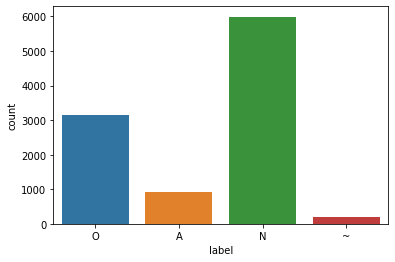

In [27]:
sns.countplot(x="label", data=labels)
plt.show()

In [28]:
%%capture
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.1)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(127, 85, 45), random_state=1)

clf.fit(train_data, train_labels)

predictions_train   = clf.predict(train_data)
predictions_test    = clf.predict(test_data)
train_score         = accuracy_score(predictions_train, train_labels)
test_score          = accuracy_score(predictions_test, test_labels)

In [29]:
print("score on train data : ", train_score)
print("score on test  data : ", test_score )

score on train data :  0.6472309526389942
score on test  data :  0.6686159844054581


In [30]:
%%capture
c = classification_report(test_labels, predictions_test)

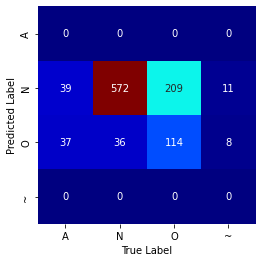

In [31]:
confusion_mtx = confusion_matrix(test_labels, predictions_test)

sns.heatmap(confusion_mtx.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['A', 'N', 'O', '~'], yticklabels=['A', 'N', 'O', '~'], cmap = plt.cm.jet)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

In [32]:
print(c)

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        76
           N       0.69      0.94      0.79       608
           O       0.58      0.35      0.44       323
           ~       0.00      0.00      0.00        19

    accuracy                           0.67      1026
   macro avg       0.32      0.32      0.31      1026
weighted avg       0.59      0.67      0.61      1026



In [49]:
Norm = StandardScaler()
Norm.fit(data)
data = pd.DataFrame(Norm.transform(data), columns = columnName)

In [50]:
%%capture
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.1)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(127, 85, 45), random_state=1)

clf.fit(train_data, train_labels)

predictions_train   = clf.predict(train_data)
predictions_test    = clf.predict(test_data)
train_score         = accuracy_score(predictions_train, train_labels)
test_score          = accuracy_score(predictions_test, test_labels)

In [51]:
print("score on train data: ", train_score)
print("score on test data : ", test_score )

score on train data:  1.0
score on test data :  0.8742690058479532


In [52]:
%%capture
c = classification_report(test_labels, predictions_test)

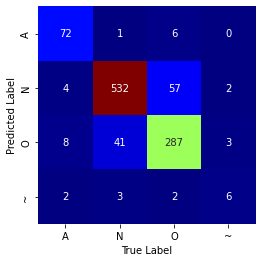

In [53]:
confusion_mtx = confusion_matrix(test_labels, predictions_test)

sns.heatmap(confusion_mtx.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['A', 'N', 'O', '~'], yticklabels=['A', 'N', 'O', '~'], cmap = plt.cm.jet)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

In [54]:
print(c)

              precision    recall  f1-score   support

           A       0.91      0.84      0.87        86
           N       0.89      0.92      0.91       577
           O       0.85      0.82      0.83       352
           ~       0.46      0.55      0.50        11

    accuracy                           0.87      1026
   macro avg       0.78      0.78      0.78      1026
weighted avg       0.87      0.87      0.87      1026



In [55]:
df          = pd.read_csv('ECG.csv', index_col=0)
data        = df.iloc[:, 1:]
labels      = df.iloc[:, [0]]
columnName  = data.columns
data.head();

In [56]:
data_r      = data.loc  [labels.label != '~', :]
labels_r    = labels.loc[labels.label != '~', :]
labels_r    = labels_r.replace('A', 'O')

In [57]:
Norm        = StandardScaler()
Norm.fit(data_r)
data_r      = pd.DataFrame(Norm.transform(data_r), columns = columnName)

In [58]:
%%capture
train_data, test_data, train_labels, test_labels = train_test_split(data_r, labels_r, test_size=0.1)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(127, 85, 45), random_state=1)

clf.fit(train_data, train_labels)

predictions_train   = clf.predict(train_data)
predictions_test    = clf.predict(test_data)
train_score         = accuracy_score(predictions_train, train_labels)
test_score          = accuracy_score(predictions_test, test_labels)

In [59]:
print("score on train data : ", train_score)
print("score on test  data : ", test_score )

score on train data :  1.0
score on test  data :  0.9106256206554121


In [44]:
%%capture
c = classification_report(test_labels, predictions_test)

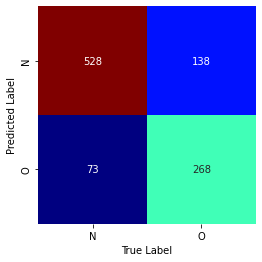

In [45]:
confusion_mtx = confusion_matrix(test_labels, predictions_test)

sns.heatmap(confusion_mtx.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['N', 'O'], yticklabels=['N', 'O'], cmap = plt.cm.jet)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

In [46]:
print(c)

              precision    recall  f1-score   support

           N       0.79      0.88      0.83       601
           O       0.79      0.66      0.72       406

    accuracy                           0.79      1007
   macro avg       0.79      0.77      0.78      1007
weighted avg       0.79      0.79      0.79      1007

